## Multiple Linear Regression from Scratch

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Loading the dataset

In [2]:
# Load the dataframe
df = pd.read_csv('energy.txt')
df.head()

,T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       7176 non-null   float64
 1   V       7176 non-null   float64
 2   AP      7176 non-null   float64
 3   RH      7176 non-null   float64
 4   EP      7176 non-null   float64
dtypes: float64(5)
memory usage: 280.4 KB


### Visualizing the dataset

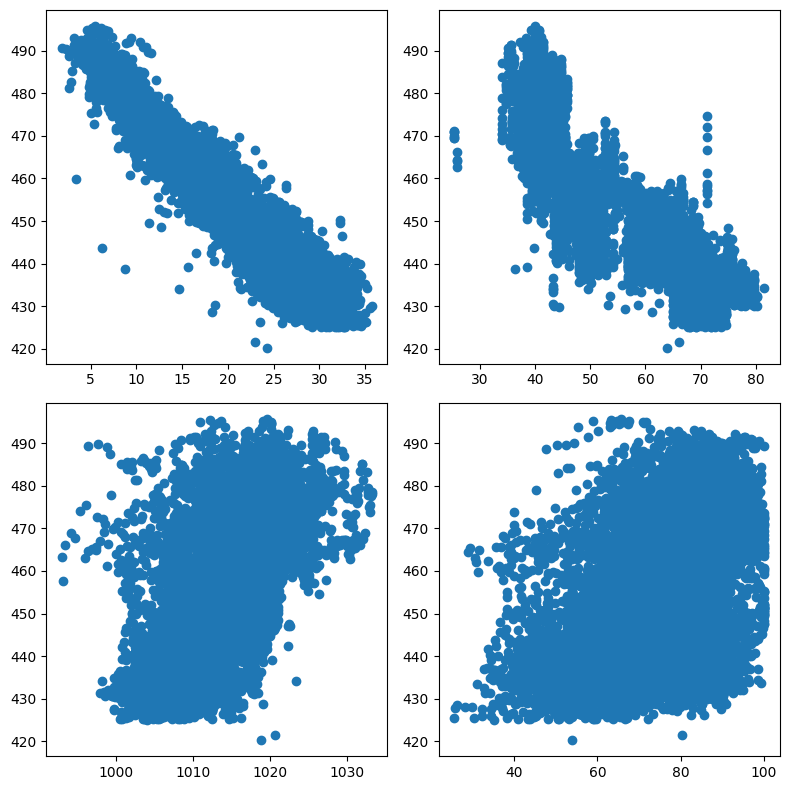

In [4]:
# Here out target variable is EP. So we will plot graphs corresponding to each feature
# plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.figsize = (10, 10)
ax[0, 0].scatter(df['T'], df['EP'])
ax[0, 1].scatter(df['V'], df['EP'])
ax[1, 0].scatter(df['AP'], df['EP'])
ax[1, 1].scatter(df['RH'], df['EP'])

plt.tight_layout()

### Preprocessing the dataset

In [5]:
# Seperate features and target variable
X = df.iloc[:, :4]
y = df.iloc[:, -1]

# Scaling the dataset to fit the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Dividing the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [6]:
# Printing the size of datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5382, 4) (1794, 4) (5382,) (1794,)


## Linear Regression from Scratch

In [7]:
def cost_function(X, y, w, b):
    """
    Parameters:
    X: features
    y: target values
    w: weights
    b: bias

    Returns:
    cost: cost with current weights and bias
    """
    cost = np.sum((((X.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [8]:
def gradient_descent_function(X, y, w, b, alpha=0.01, epochs=1000):
    """
    Parameters:
    X: features
    y: target values
    w: initial weights
    b: initial bias
    alpha: learning rate
    epochs: number of iterations

    Returns:
    costs: cost per epoch
    w: finalised weights
    b: finalised bias
    """
    m = len(y)
    costs = [0] * epochs

    for epoch in range(epochs):
        # Calculate the value -- Forward Propagation
        z = X.dot(w) + b

        # Calculate the losses
        loss = z - y

        # Calculate gradient descent
        weight_gradient = X.T.dot(loss) / m
        bias_gradient = np.sum(loss) / m

        # Update weights and bias
        w = w - alpha*weight_gradient
        b = b - alpha*bias_gradient

        # Store current lost
        cost = cost_function(X, y, w, b)
        costs[epoch] = cost

    return w, b, costs

In [9]:
# Initial random weights
w = np.random.randn(X_train.shape[1])
# Initial bias
b = 0
weights, bias, costs = gradient_descent_function(X_train, y_train, w, b, epochs=2500);

In [10]:
print(weights)
print(bias)

[-14.25064087  -3.36906605   0.39003797  -2.15314865]
454.4162847781383


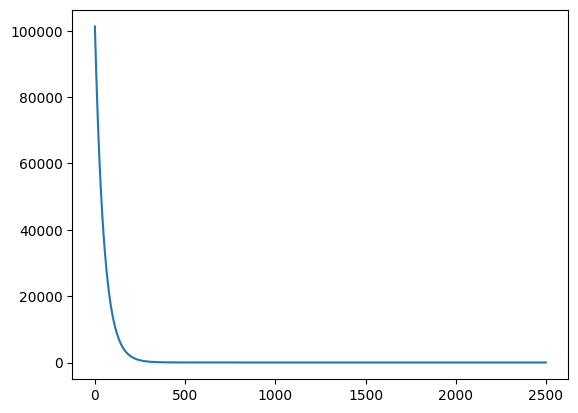

In [11]:
import matplotlib.pyplot as plt
# Plotting the cost function
plt.plot(costs)
plt.show()

### Calculating the performace of our model

In [12]:
def predict(X, w, b):
    return X.dot(w) + b

In [13]:
def r2score(y_pred, y):
    """
    Parameters:
    y_pred: predicted values
    y: actual values

    Returns:
    r2: r2 score
    """
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2

In [14]:
# Predicted values with our model
y_pred = predict(X_test, weights, bias)

In [15]:
from sklearn.metrics import r2_score,mean_squared_error
score=r2_score(y_test,y_pred)
print("R2 Score :",score.round(4))
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error :",mse.round(4))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :",rmse.round(4))

R2 Score : 0.9321
Mean Squared Error : 20.4641
Root Mean Squared Error : 4.5237


The r2 value of our model is 0.93 which is impressive.